<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

# Clustering - Mini Hackathon Sample Solutions

*Make a copy of this notebook to edit!*

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.searchenginejournal.com%2Fwp-content%2Fuploads%2F2020%2F08%2Fcopy-the-colab-notebook-to-your-google-drive-5f2579179f746.jpg&f=1&nofb=1" alt="Make a copy" class="center" height="200">

</center>

In [53]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [23]:
# Load Data
mel = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT9qetZw-uGS1u44KiW-XOJJkhmX0BKPdcsQ_X9cwTHlsTvlBHbEyA5G_D8r9knBbPOQ7My-W4pTfy2/pub?gid=2140088293&single=true&output=csv')
mel.head()

,price,rooms,bed,bath,car,land,lat,long
0,1480000,2,2,1,1,202,-37.7996,144.9984
1,1035000,2,2,1,0,156,-37.8079,144.9934
2,1465000,3,3,2,0,134,-37.8093,144.9944
3,850000,3,3,2,1,94,-37.7969,144.9969
4,1600000,4,3,1,2,120,-37.8072,144.9941


In [24]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17501 entries, 0 to 17500
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   17501 non-null  int64  
 1   rooms   17501 non-null  int64  
 2   bed     17501 non-null  int64  
 3   bath    17501 non-null  int64  
 4   car     17501 non-null  int64  
 5   land    17501 non-null  int64  
 6   lat     17501 non-null  float64
 7   long    17501 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


In [25]:
mel.describe()

,price,rooms,bed,bath,car,land,lat,long
count,1.750100e+04,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000
mean,1.061650e+06,3.040969,3.023941,1.571053,1.689732,592.388149,-37.806103,144.996005
std,5.600767e+05,0.936914,0.950157,0.687974,0.991600,3805.227151,0.089605,0.117395
min,8.500000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790
25%,6.570000e+05,2.000000,2.000000,1.000000,1.000000,220.000000,-37.859190,144.924400
50%,9.100000e+05,3.000000,3.000000,1.000000,2.000000,512.000000,-37.798500,145.002400
75%,1.325000e+06,4.000000,4.000000,2.000000,2.000000,662.000000,-37.748970,145.067600
max,3.450000e+06,12.000000,20.000000,9.000000,18.000000,433014.000000,-37.399460,145.526350


## Lets visulize the data with plotly

In [ ]:
import plotly.express as px
# Documentation: https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html
px.scatter_mapbox(mel, lat='lat',lon='long',color='price',
                  mapbox_style="open-street-map",)

### # Creating a function plot_k_values() to calculate and plot inertia and silhouette score for various values of k

In [26]:
from matplotlib import figure
from matplotlib.figure import Figure

def plot_k_values(data, ks):
  """plot the silhouette score and inertia 
  of a KMeans model for various k values"""

  sils = []
  inertias = []

  # evaluate inertia and silhouette score
  for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sils.append(silhouette_score(data, km.labels_))
    inertias.append(km.inertia_)
      
  # plot inertia and silhouette score in two different graph
  # fig, ax1 = plt.subplots(figsize=(9,7))
  # ax1.set_xlabel('number of clusters')
  # ax1.set_ylabel('Inertia', color = 'blue')
  # ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  # different way to plot the graph
  # plot inertia and silhouette score in one graph using twinx()
  fig, ax1 = plt.subplots(figsize=(9,7))
  ax1.set_xlabel('number of clusters')
  ax1.set_ylabel('Inertia', color = 'blue')
  ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  ax2 = ax1.twinx()
  
  ax2.set_ylabel('Silhouette Score', color = 'red')
  ax2.plot(ks, sils, color = 'red',label='silhouette score',marker='+')
  ax1.legend(loc=0)  
  ax2.legend(loc='upper left')
  plt.grid()
  plt.show()

### Lets visulize houses using scatter plot before clustering 

In [ ]:
# plot the houses by location, color by house prices
mel.plot(kind="scatter", x="long", y="lat", c="price",
         cmap="coolwarm", figsize=(12, 10), s=2);

# Part- (a) Cluster the data using most or all features and analyze those clusters to explain how the clusters are different. (no train test split required) 

In [49]:
# Analyzing cluster using location data 'lat' and 'long'

# extract the location data
mel_loc = mel[['lat', 'long']]

# scale the data
mel_loc_scaled = StandardScaler().fit_transform(mel_loc)

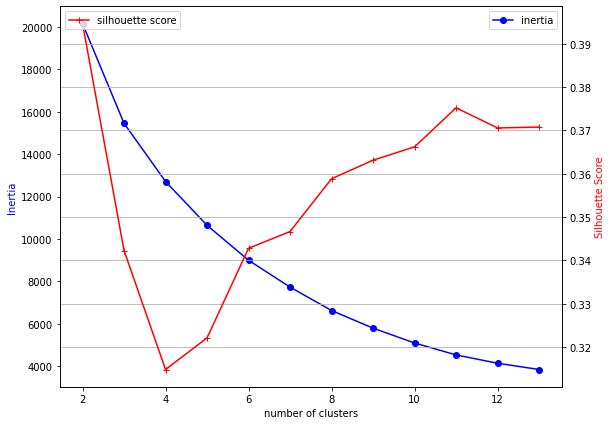

In [50]:
# find best k 

plot_k_values(mel_loc_scaled,range(2,14)) # you can select any range of values to find k

### Optimal value of based on
- ineria 
    - graph does not show significant elbow but we can consider k=7. 
- silhouette score
    - best value of k=2. But, we can also try using k=7,11 for trial

##### Let's visualize the clusters based on k = 2,7,11

##### k=2

In [65]:
# instentiate the cluster and fit 
km = KMeans(n_clusters=2, random_state=42)
km.fit(mel_loc_scaled)

# add a column to the dataframe to add the cluster label as you fit  
mel['cluster'] = km.labels_

mel.head()

,price,rooms,bed,bath,car,land,lat,long,cluster
0,1480000,2,2,1,1,202,-37.7996,144.9984,0
1,1035000,2,2,1,0,156,-37.8079,144.9934,0
2,1465000,3,3,2,0,134,-37.8093,144.9944,0
3,850000,3,3,2,1,94,-37.7969,144.9969,0
4,1600000,4,3,1,2,120,-37.8072,144.9941,0


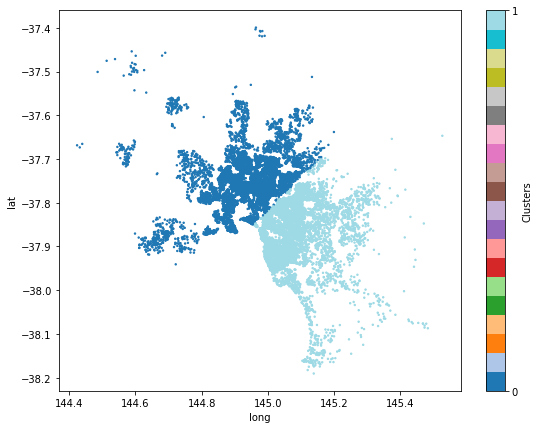

In [66]:
# kmeans
plt.figure(figsize=(9,7))
plt.scatter( x=mel["long"], y=mel["lat"], c=km.labels_, 
         cmap = 'tab20', s=2)
plt.xlabel('long')
plt.ylabel('lat')
ticks = np.sort(np.unique(km.labels_))
cb=plt.colorbar(ticks=ticks);
cb.set_label('Clusters')

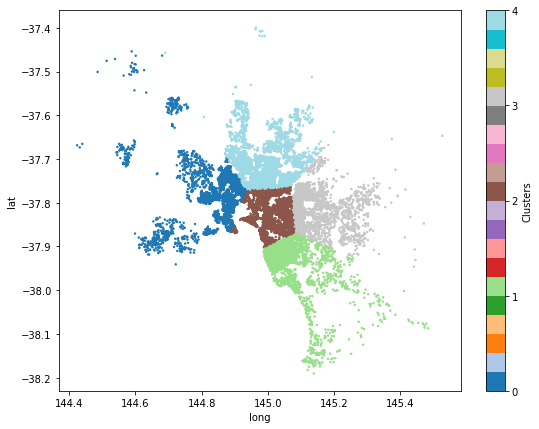

In [62]:
# instentiate the cluster and fit with k=5
km = KMeans(n_clusters=5, random_state=42)
km.fit(mel_loc_scaled)

# add a column to the dataframe to add the cluster label as you fit  
mel['cluster'] = km.labels_

mel.head()
# kmeans
plt.figure(figsize=(9,7))
plt.scatter( x=mel["long"], y=mel["lat"], c=km.labels_, 
         cmap = 'tab20', s=2)
plt.xlabel('long')
plt.ylabel('lat')
ticks = np.sort(np.unique(km.labels_))
cb=plt.colorbar(ticks=ticks);
cb.set_label('Clusters')

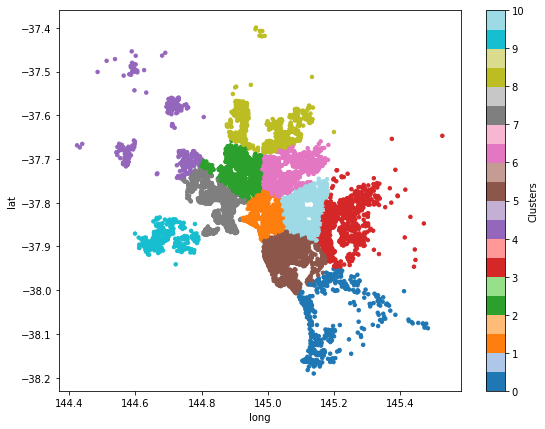

In [71]:
# instentiate the cluster and fit with k=11
km = KMeans(n_clusters=11, random_state=42)
km.fit(mel_loc_scaled)

# add a column to the dataframe to add the cluster label as you fit  
mel['cluster'] = km.labels_

mel.head()
# kmeans
plt.figure(figsize=(9,7))
plt.scatter( x=mel["long"], y=mel["lat"], c=km.labels_, 
         cmap = 'tab20', s=12)
plt.xlabel('long')
plt.ylabel('lat')
ticks = np.sort(np.unique(km.labels_))
cb=plt.colorbar(ticks=ticks);
cb.set_label('Clusters')

### Lets invastigate the clusters with k=11

In [72]:
# Use .groupby() to investigate the minimum, maximum, and mean value for each feature in each cluster.
cluster_groups = mel.groupby('cluster').mean()
cluster_groups

# # another way to find min/max/avd
# cluster_groups = df.groupby('cluster')['lat'].describe()
# cluster_groups

,price,rooms,bed,bath,car,land,lat,long
cluster,,,,,,,,
0,7.545856e+05,3.358916,3.358916,1.659142,2.065463,689.173815,-38.057596,145.185398
1,1.165951e+06,2.382100,2.371084,1.403098,1.093287,590.970396,-37.828576,144.991952
2,9.221670e+05,2.993513,2.972429,1.466104,1.658450,463.423938,-37.739955,144.924091
3,1.022082e+06,3.560759,3.581013,1.827848,2.006329,960.067089,-37.842471,145.232914
4,5.878346e+05,3.558405,3.558405,1.849003,2.139601,2085.700855,-37.652063,144.685924
5,1.305483e+06,3.145954,3.130468,1.691831,1.844367,516.217964,-37.918962,145.052215
6,9.462588e+05,3.038462,3.021779,1.474977,1.714551,538.727989,-37.735039,145.040381
7,8.502951e+05,2.962802,2.931401,1.400966,1.705797,493.626087,-37.804250,144.862041
8,6.121611e+05,3.450667,3.445333,1.740000,1.985333,552.592000,-37.630446,144.998365


In [73]:
cluster_groups.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='cluster')

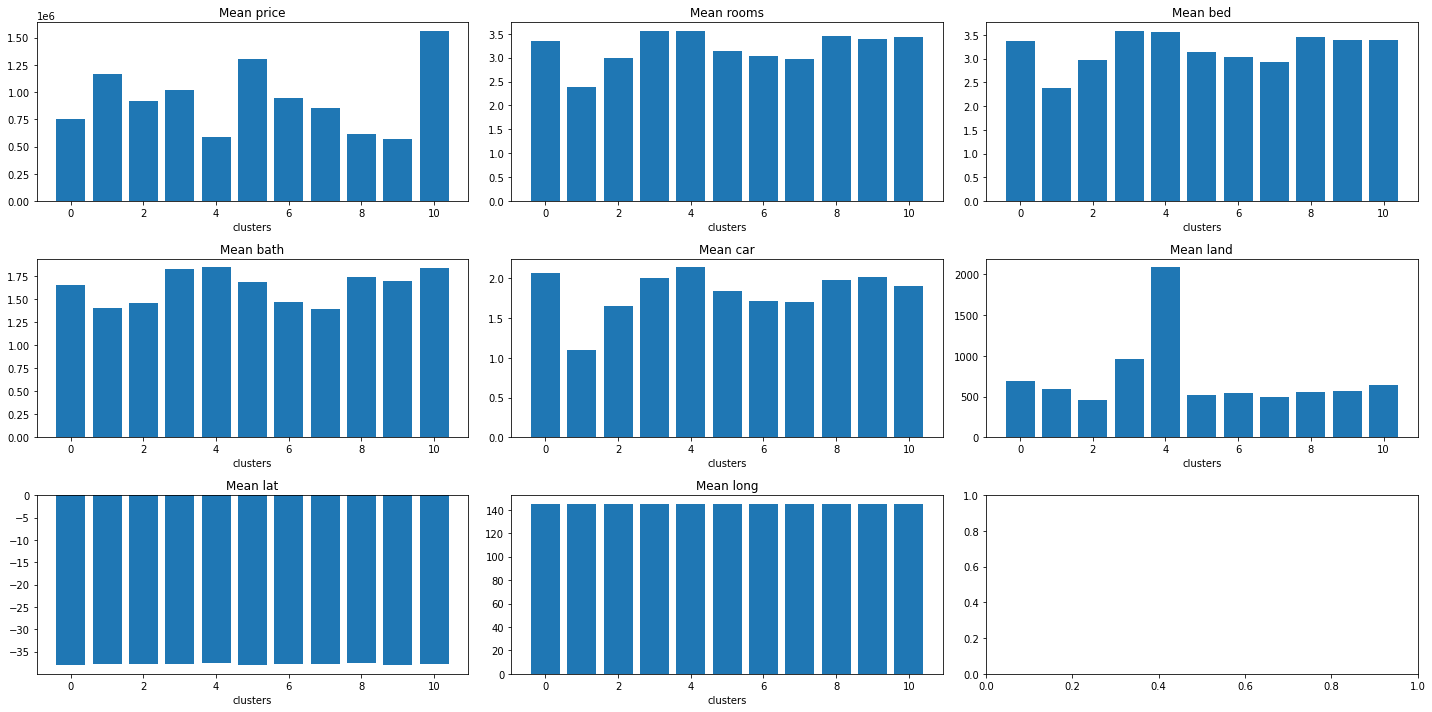

In [74]:
## Visualize means 

fig, axes = plt.subplots(3,3, figsize = (20, 10))
ax = 0
axes = axes.ravel()
for col in cluster_groups.columns:
  axes[ax].bar(cluster_groups.index, cluster_groups[col])
  axes[ax].set_title(f'Mean {col}')
  axes[ax].set_xlabel('clusters')
  ax += 1
plt.tight_layout()

# Part (b) Improve a supervised learning model to predict the price of a house. You can use any model you want, but must include cluster labels as a feature.If you choose this option, you must train test split.

### Model without clustering (base model)


In [77]:
# Perform train test split on data
X = mel.drop(columns = ['price'])
y = mel['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [78]:
# Scale the data

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [79]:
# instentiate the LinearRegression model and fit on train data
model = LinearRegression()
model.fit(X_train, y_train)

# check the score without clustering
print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.303809161267269
Testing r2: 0.3021070877557397


### Test KMeans clusters in a model

In [100]:
# Let's see what adding the Kmeans clusters does!

km = KMeans(n_clusters=11, random_state=42)

km.fit(X_train)

X_train['cluster'] = km.predict(X_train)

#Don't fit on test data!
X_test['cluster'] = km.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.348170863536874
Testing r2: 0.3399250170697762


- Essentially, model improved 3% when used KMeans

In [86]:
# Let's see what adding the Kmeans clusters does!

km = KMeans(n_clusters=5, random_state=42)

km.fit(X_train)

X_train['cluster'] = km.predict(X_train)

#Don't fit on test data!
X_test['cluster'] = km.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.3216625643632619
Testing r2: 0.31897453001280873


# Our neighborhood clusters improved our model performance!
